# YOLOV8关键点检测预测-Python API-图像

同济子豪兄 2023-4-27

## 导入工具包

In [1]:
from ultralytics import YOLO
import torch

import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# 有 GPU 就用 GPU，没有就用 CPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('device:', device)

device: cpu


## 载入模型

In [3]:
# model = YOLO('checkpoint/Triangle_215_yolov8n_pretrain.pt')
# model = YOLO('checkpoint/Triangle_215_yolov8x_p6_pretrain.pt')

model = YOLO('checkpoint/best.pt')


## 计算设备

In [4]:
# 切换计算设备
model.to(device)
# model.cpu()  # CPU
# model.cuda() # GPU

## 模型自带信息

In [5]:
model.device

device(type='cpu')

In [6]:
model.names

{0: 'sjb_rect'}

## 预测

传入图像、视频、摄像头ID（对应命令行的 source 参数）

In [7]:
img_path = 'images/triangle_4.jpg'

In [8]:
results = model(img_path)


image 1/1 C:\source\ai\zihao\Train_Custom_Dataset\lab5\images\triangle_4.jpg: 448x640 3 sjb_rects, 160.9ms
Speed: 3.0ms preprocess, 160.9ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)


## 解析预测结果

In [9]:
len(results)

1

In [10]:
results[0]

ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: ultralytics.engine.results.Keypoints object
keys: ['boxes', 'keypoints']
masks: None
names: {0: 'sjb_rect'}
orig_img: array([[[140, 140, 140],
        [140, 140, 140],
        [140, 140, 140],
        ...,
        [ 94,  94,  94],
        [ 94,  94,  94],
        [ 94,  94,  94]],

       [[140, 140, 140],
        [140, 140, 140],
        [140, 140, 140],
        ...,
        [ 94,  94,  94],
        [ 94,  94,  94],
        [ 94,  94,  94]],

       [[140, 140, 140],
        [140, 140, 140],
        [140, 140, 140],
        ...,
        [ 94,  94,  94],
        [ 94,  94,  94],
        [ 94,  94,  94]],

       ...,

       [[119, 119, 119],
        [119, 119, 119],
        [119, 119, 119],
        ...,
        [ 76,  76,  76],
        [ 76,  76,  76],
        [ 76,  76,  76]],

       [[118, 118, 118],
        [118, 118, 118],
        [118, 118, 118],
        ...,
   

## 解析目标检测预测结果

In [11]:
# 预测框的所有类别（MS COCO数据集八十类）
results[0].names

{0: 'sjb_rect'}

In [12]:
# 预测类别 ID
results[0].boxes.cls

tensor([0., 0., 0.])

In [13]:
num_bbox = len(results[0].boxes.cls)
print('预测出 {} 个框'.format(num_bbox))

预测出 3 个框


In [14]:
# 每个框的置信度
results[0].boxes.conf

tensor([0.9454, 0.9348, 0.9256])

In [15]:
# 每个框的：左上角XY坐标、右下角XY坐标
results[0].boxes.xyxy

tensor([[1236.,  423., 2555., 1745.],
        [1741., 1896., 2559., 3545.],
        [2921.,  634., 4463., 1551.]])

In [24]:
# 转成整数的 numpy array
bboxes_xyxy = results[0].boxes.xyxy.cpu().numpy().astype('uint32')

In [27]:
results[0].boxes.xyxy

tensor([[1236.,  423., 2555., 1745.],
        [1741., 1896., 2559., 3545.],
        [2921.,  634., 4463., 1551.]])

In [25]:
bboxes_xyxy

array([[1236,  423, 2555, 1745],
       [1741, 1896, 2559, 3545],
       [2921,  634, 4463, 1551]], dtype=uint32)

## 解析关键点检测预测结果

In [18]:
# 每个框，每个关键点的 XY坐标 置信度
results[0].keypoints.shape

torch.Size([3, 3, 3])

In [28]:
results[0].keypoints

ultralytics.engine.results.Keypoints object with attributes:

conf: tensor([[0.9321, 0.9631, 0.9815],
        [0.9299, 0.9392, 0.9715],
        [0.8865, 0.9430, 0.9722]])
data: tensor([[[1.3420e+03, 1.7652e+03, 9.3214e-01],
         [2.1576e+03, 5.3109e+02, 9.6307e-01],
         [2.4664e+03, 1.0944e+03, 9.8150e-01]],

        [[2.4749e+03, 1.9775e+03, 9.2988e-01],
         [2.4874e+03, 3.5350e+03, 9.3918e-01],
         [1.7252e+03, 3.1602e+03, 9.7150e-01]],

        [[2.9831e+03, 1.3630e+03, 8.8655e-01],
         [4.3997e+03, 7.1454e+02, 9.4297e-01],
         [4.3672e+03, 1.5536e+03, 9.7219e-01]]])
has_visible: True
orig_shape: (3712, 5568)
shape: torch.Size([3, 3, 3])
xy: tensor([[[1342.0369, 1765.2299],
         [2157.6309,  531.0926],
         [2466.3896, 1094.3835]],

        [[2474.9170, 1977.4833],
         [2487.3977, 3535.0066],
         [1725.2014, 3160.1670]],

        [[2983.1365, 1362.9518],
         [4399.6582,  714.5448],
         [4367.2300, 1553.6108]]])
xyn: tensor([[[

In [31]:
# bboxes_keypoints = results[0].keypoints.cpu().numpy().astype('uint32')
bboxes_keypoints = results[0].keypoints.data.cpu().numpy().astype('uint32')

In [32]:
# 转为 numpy array
bboxes_keypoints

array([[[1342, 1765,    0],
        [2157,  531,    0],
        [2466, 1094,    0]],

       [[2474, 1977,    0],
        [2487, 3535,    0],
        [1725, 3160,    0]],

       [[2983, 1362,    0],
        [4399,  714,    0],
        [4367, 1553,    0]]], dtype=uint32)

## OpenCV可视化关键点

In [33]:
img_bgr = cv2.imread(img_path)

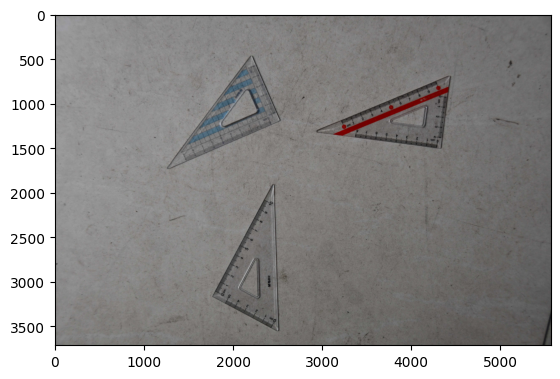

In [34]:
# bgr -> rgb
plt.imshow(img_bgr[:,:,::-1])
plt.show()

In [35]:
# 框（rectangle）可视化配置
bbox_color = (150, 0, 0)             # 框的 BGR 颜色
bbox_thickness = 6                   # 框的线宽

# 框类别文字
bbox_labelstr = {
    'font_size':4,         # 字体大小
    'font_thickness':10,   # 字体粗细
    'offset_x':0,          # X 方向，文字偏移距离，向右为正
    'offset_y':-80,        # Y 方向，文字偏移距离，向下为正
}

In [36]:
# 关键点 BGR 配色
kpt_color_map = {
    0:{'name':'angle_30', 'color':[255, 0, 0], 'radius':40},      # 30度角点
    1:{'name':'angle_60', 'color':[0, 255, 0], 'radius':40},      # 60度角点
    2:{'name':'angle_90', 'color':[0, 0, 255], 'radius':40},      # 90度角点
}

# 点类别文字
kpt_labelstr = {
    'font_size':4,             # 字体大小
    'font_thickness':10,       # 字体粗细
    'offset_x':30,             # X 方向，文字偏移距离，向右为正
    'offset_y':120,            # Y 方向，文字偏移距离，向下为正
}

# 骨架连接 BGR 配色
skeleton_map = [
    {'srt_kpt_id':0, 'dst_kpt_id':1, 'color':[196, 75, 255], 'thickness':12},        # 30度角点-60度角点
    {'srt_kpt_id':0, 'dst_kpt_id':2, 'color':[180, 187, 28], 'thickness':12},        # 30度角点-90度角点
    {'srt_kpt_id':1, 'dst_kpt_id':2, 'color':[47,255, 173], 'thickness':12},         # 60度角点-90度角点
]

In [37]:
for idx in range(num_bbox): # 遍历每个框
    
    # 获取该框坐标
    bbox_xyxy = bboxes_xyxy[idx] 
    
    # 获取框的预测类别（对于关键点检测，只有一个类别）
    bbox_label = results[0].names[0]
    
    # 画框
    img_bgr = cv2.rectangle(img_bgr, (bbox_xyxy[0], bbox_xyxy[1]), (bbox_xyxy[2], bbox_xyxy[3]), bbox_color, bbox_thickness)
    
    # 写框类别文字：图片，文字字符串，文字左上角坐标，字体，字体大小，颜色，字体粗细
    img_bgr = cv2.putText(img_bgr, bbox_label, (bbox_xyxy[0]+bbox_labelstr['offset_x'], bbox_xyxy[1]+bbox_labelstr['offset_y']), cv2.FONT_HERSHEY_SIMPLEX, bbox_labelstr['font_size'], bbox_color, bbox_labelstr['font_thickness'])
    
    bbox_keypoints = bboxes_keypoints[idx] # 该框所有关键点坐标和置信度
    
    # 画该框的骨架连接
    for skeleton in skeleton_map:
        
        # 获取起始点坐标
        srt_kpt_id = skeleton['srt_kpt_id']
        srt_kpt_x = bbox_keypoints[srt_kpt_id][0]
        srt_kpt_y = bbox_keypoints[srt_kpt_id][1]
        
        # 获取终止点坐标
        dst_kpt_id = skeleton['dst_kpt_id']
        dst_kpt_x = bbox_keypoints[dst_kpt_id][0]
        dst_kpt_y = bbox_keypoints[dst_kpt_id][1]
        
        # 获取骨架连接颜色
        skeleton_color = skeleton['color']
        
        # 获取骨架连接线宽
        skeleton_thickness = skeleton['thickness']
        
        # 画骨架连接
        img_bgr = cv2.line(img_bgr, (srt_kpt_x, srt_kpt_y),(dst_kpt_x, dst_kpt_y),color=skeleton_color,thickness=skeleton_thickness)
        
    # 画该框的关键点
    for kpt_id in kpt_color_map:
        
        # 获取该关键点的颜色、半径、XY坐标
        kpt_color = kpt_color_map[kpt_id]['color']
        kpt_radius = kpt_color_map[kpt_id]['radius']
        kpt_x = bbox_keypoints[kpt_id][0]
        kpt_y = bbox_keypoints[kpt_id][1]
        
        # 画圆：图片、XY坐标、半径、颜色、线宽（-1为填充）
        img_bgr = cv2.circle(img_bgr, (kpt_x, kpt_y), kpt_radius, kpt_color, -1)
        
        # 写关键点类别文字：图片，文字字符串，文字左上角坐标，字体，字体大小，颜色，字体粗细
        # kpt_label = str(kpt_id) # 写关键点类别 ID
        kpt_label = str(kpt_color_map[kpt_id]['name']) # 写关键点类别名称
        img_bgr = cv2.putText(img_bgr, kpt_label, (kpt_x+kpt_labelstr['offset_x'], kpt_y+kpt_labelstr['offset_y']), cv2.FONT_HERSHEY_SIMPLEX, kpt_labelstr['font_size'], kpt_color, kpt_labelstr['font_thickness'])

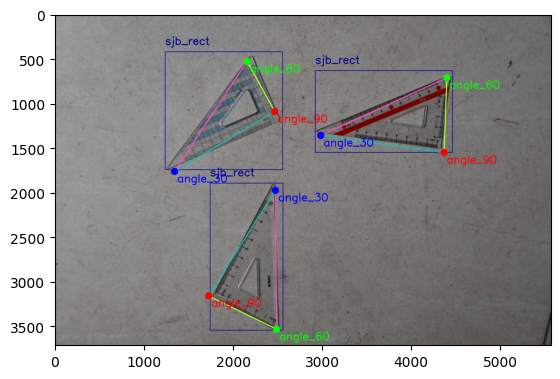

In [38]:
plt.imshow(img_bgr[:,:,::-1])
plt.show()

In [39]:
cv2.imwrite('C1_output.jpg', img_bgr)

True